In [286]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

## Convert CSV Files to Pandas DataFrames

In [287]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [288]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [289]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [290]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [291]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [292]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [293]:
# Get the data types of each column.
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

### Create a PyBer Summary DataFrame

In [294]:
# Calculate total rides by city type.
type_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [295]:
# Calculate total drivers by city type.
type_total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
type_total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [296]:
# Calculate total fares by city type.
type_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
type_total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [297]:
# Calculate the average fare per ride.
type_avg_fare_per_ride = type_total_fares / type_total_rides
type_avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [298]:
# Calculate the average fare per driver.
type_avg_fare_per_driver = type_total_fares / type_total_drivers
type_avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [321]:
# Combine each series into single summary dataframe.
city_type_summary = pd.DataFrame({"Total Rides": type_total_rides,
                                  "Total Drivers": type_total_drivers,
                                  "Total Fares": type_total_fares,
                                  "Average Fare per Ride": type_avg_fare_per_ride,
                                  "Average Fare per Driver": type_avg_fare_per_driver})

# Format each  column.
city_type_summary["Total Rides"] = city_type_summary["Total Rides"].map("{:,.0f}".format)
city_type_summary["Total Drivers"] = city_type_summary["Total Drivers"].map("{:,.0f}".format)
city_type_summary["Total Fares"] = city_type_summary["Total Fares"].map("${:,.2f}".format)
city_type_summary["Average Fare per Ride"] = city_type_summary["Average Fare per Ride"].map("${:,.2f}".format)
city_type_summary["Average Fare per Driver"] = city_type_summary["Average Fare per Driver"].map("${:,.2f}".format)

# Remove the index name.
city_type_summary.index.name = None

# save dataframe to an html file
city_type_summary.to_html("analysis/city_summary_challenge.html")

### PyBer Summary Dataframe

In [315]:
# Display the DataFrame.
city_type_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


### Create a Multiple-Line Plot for the Sum of the Fares for Each City Type

In [300]:
# create a copy of pyber data datafrome
pyber_data_copy_df = pyber_data_df.copy()

pyber_data_copy_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [301]:
#  rename columns
pyber_data_copy_df.rename(columns={"city": "City", "date":"Date", "fare":"Fare", "ride_id":
                                    "Ride Id", "driver_count": "No. Drivers", "type":"City Type"}, inplace="True")

pyber_data_copy_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [303]:
# checking data in copy
pyber_data_copy_df.count()

City           2375
Date           2375
Fare           2375
Ride Id        2375
No. Drivers    2375
City Type      2375
dtype: int64

In [305]:
# convert Date column to datetime dtype
pyber_data_copy_df['Date'] = pd.to_datetime(pyber_data_copy_df['Date'])
pyber_data_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         2375 non-null   object        
 1   Date         2375 non-null   datetime64[ns]
 2   Fare         2375 non-null   float64       
 3   Ride Id      2375 non-null   float64       
 4   No. Drivers  2375 non-null   int64         
 5   City Type    2375 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 129.9+ KB


In [306]:
# set the index to Date
pyber_data_copy_df.set_index('Date', inplace=True)
pyber_data_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Fare         2375 non-null   float64
 2   Ride Id      2375 non-null   float64
 3   No. Drivers  2375 non-null   int64  
 4   City Type    2375 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 111.3+ KB


In [307]:
# new dataframe with only the fares by city type indexed on date
fares_city_type = pyber_data_copy_df[["Fare","City Type"]].copy()
fares_city_type.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [308]:
# Get sum of fares for each city type and date.
sum_fares_city_type = fares_city_type.groupby(["Date","City Type"]).sum()["Fare"].reset_index()
sum_fares_city_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2364 non-null   datetime64[ns]
 1   City Type  2364 non-null   object        
 2   Fare       2364 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.5+ KB


In [309]:
# set the index to the Date
sum_fares_city_type.set_index('Date', inplace=True)
sum_fares_city_type.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2364 entries, 2019-01-01 00:08:00 to 2019-05-08 13:10:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2364 non-null   object 
 1   Fare       2364 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.4+ KB


In [310]:
# create a pivot table by date for the sum of fares with City Type as the columns
fares_table = pd.pivot_table(sum_fares_city_type, values="Fare", index=['Date'],
                    columns=['City Type'], aggfunc=np.sum)
fares_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 13:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [311]:
# create new dataframe from pivot for Jan 2019 to Apr 28 2109

jan_apr_fares = fares_table.loc['2019-01-01':'2019-04-28']
jan_apr_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [312]:
# create weekly summary of jan_apr_fares.
weekly_summary = jan_apr_fares.resample('W').sum().reset_index()
weekly_summary

City Type,Date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


In [238]:
# create a list of weeks from the dataframe
weeks = weekly_summary["Date"]
weeks

0    2019-01-06
1    2019-01-13
2    2019-01-20
3    2019-01-27
4    2019-02-03
5    2019-02-10
6    2019-02-17
7    2019-02-24
8    2019-03-03
9    2019-03-10
10   2019-03-17
11   2019-03-24
12   2019-03-31
13   2019-04-07
14   2019-04-14
15   2019-04-21
16   2019-04-28
Name: Date, dtype: datetime64[ns]

In [313]:
# set a variable to the list of city types to use as y axis in chart
city_types = fares_table.columns.tolist()
city_types

['Rural', 'Suburban', 'Urban']

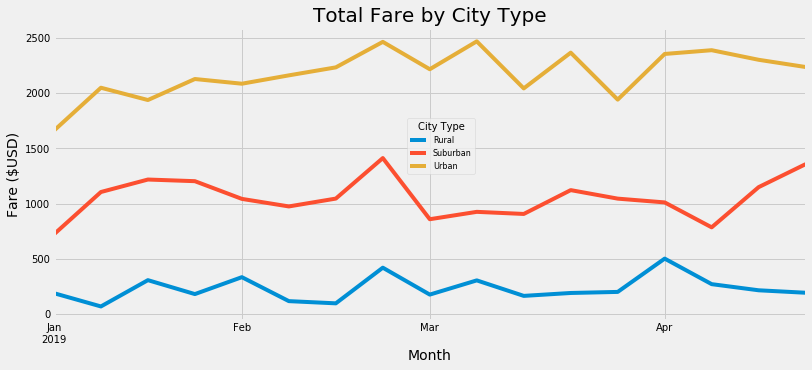

In [314]:
# create FiveThirtyEight style chart showing fares by city type.

# setting FiveThirtyEight style
plt.style.use('fivethirtyeight')

# create fivethirtyeight style chart from weekly summary dataframe
fare_by_type_chart = weekly_summary.plot(x = 'Date', y = city_types, 
                                         figsize = (12,5), 
                                         fontsize = 10)

# add title and x & y axis labels
fare_by_type_chart.set_title("Total Fare by City Type", fontsize = 20)
fare_by_type_chart.set_xlabel("Month", fontsize = 14)
fare_by_type_chart.set_ylabel("Fare ($USD)", fontsize = 14)

# locate and format legend
lgnd = fare_by_type_chart.legend(fontsize="8", mode="Expanded", loc=(.47,.5), title="City Type")
lgnd.get_title().set_fontsize(10)

# Save Figure
plt.savefig("analysis/Fig8_Challenge.png")

# Show Figure
plt.show()